In [79]:
%run C:\Users\Utente\Desktop\STAT_ML_proj\FUNZIONI.ipynb
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation, FFMpegWriter
from itertools import product

In [69]:
hyper = {
    "d": 3,
    "beta": 0.5,
    "gamma": 0.5,
    "inner_n": 200,
    "outer_n": 30,
    "lambda_reg" : 0.001
}

d = 3

noise = 1

In [70]:
G_s = nx.barabasi_albert_graph(30,1,seed=43)
G_t = noise_sp(G_s,3/10,2)

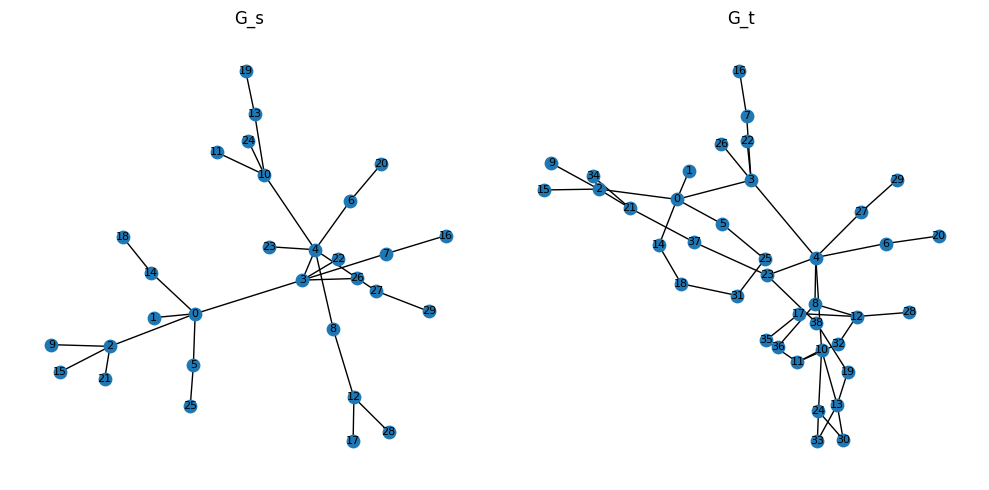

In [71]:
f,ax = plt.subplots(1,2,figsize = (10,5))
                    
pos_s=nx.spring_layout(G_s,iterations=40)
nx.draw(G_s,pos=pos_s, ax=ax[0], with_labels=True, node_size = 80, font_size=8)
ax[0].set_title("G_s")

pos_t=nx.spring_layout(G_t,iterations=40)
nx.draw(G_t,pos=pos_t, ax=ax[1], with_labels=True, node_size = 80, font_size=8)
ax[1].set_title("G_t")



plt.tight_layout()

In [72]:
m_s = adj_matrix_sp(G_s)
m_t = adj_matrix_sp(G_t)
l_s = len(G_s.nodes())
l_t = len(G_t.nodes())
C_s = build_similitude_matrices(m_s)
C_t = build_similitude_matrices(m_t)
M_s = build_measure(m_s)
M_t = build_measure(m_t)

In [73]:
emb_s = np.random.rand(d, l_s) * 5
emb_2 = emb_s + np.random.rand(d,l_s) * noise
emb_t = np.zeros((d,l_t))
for i in range(l_s):
    emb_t[:,i] = emb_2[:,i]
for i in range(l_s,l_t):
    emb_t[:,i] = (np.random.rand(d, 1) * 5).reshape(-1)

In [74]:
np.all(emb_s[:,-1] == emb_t[:,l_s-1])

False

In [75]:
embed_s, embed_t, T, correspondence, total_loss, embed_s_history, embed_t_history = GWL_simple_3(C_s, C_t, M_s, M_t,emb_s,emb_t, hyper)

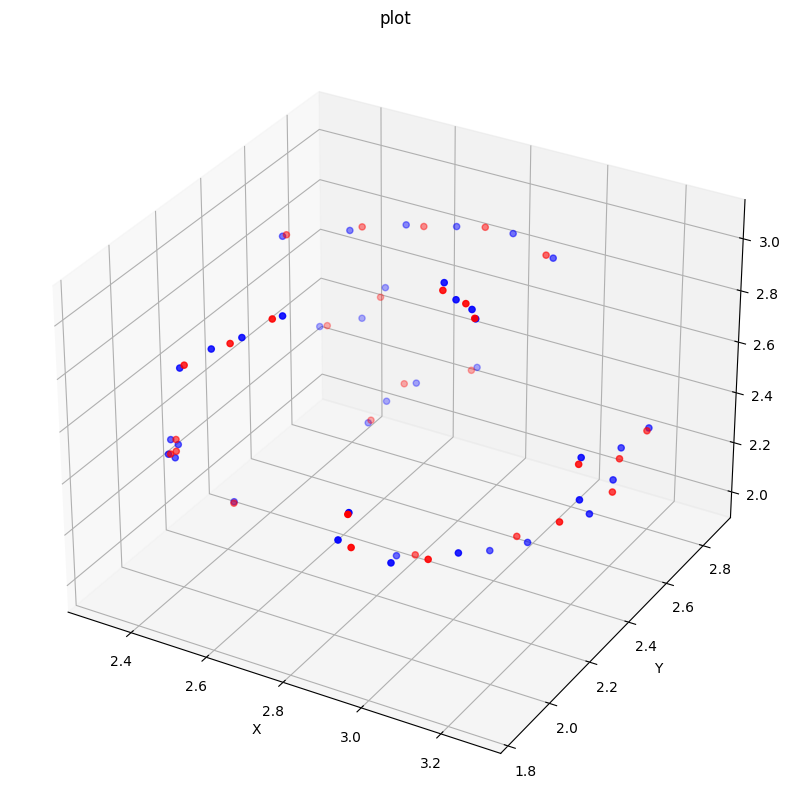

In [76]:
print_embeddings_one(embed_s, embed_t,)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

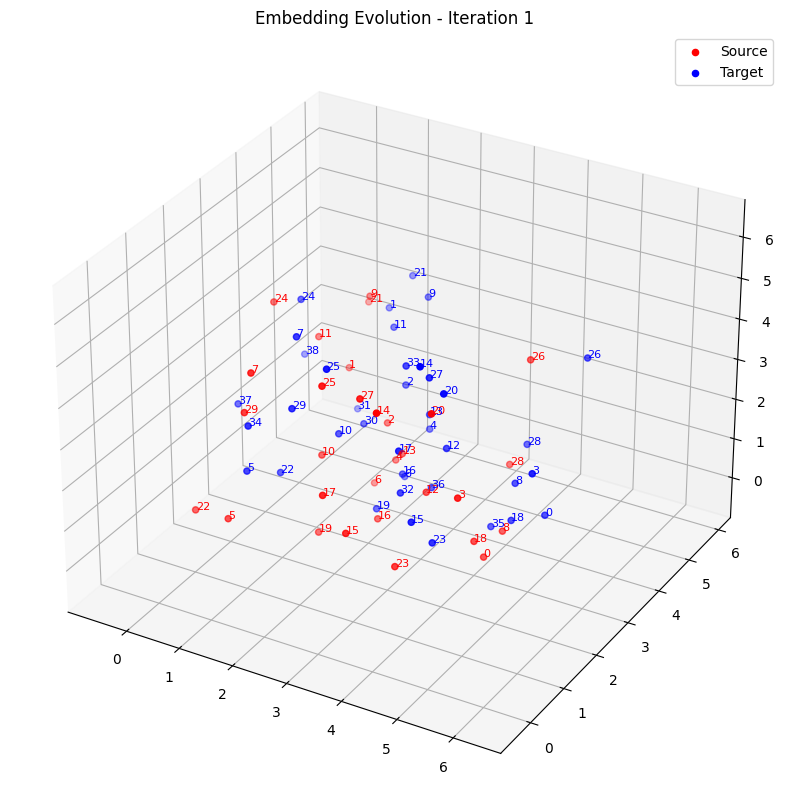

In [80]:
create_embeddings_animation_2(embed_s_history, embed_t_history)